In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# low frequency definition
def low_frequency(x, freq):
    return np.sin(freq * np.pi * x / 5)
def regular_frequency(x, freq):
    return np.sin(freq * np.pi * x)
def high_frequency(x, freq):
    return np.sin(freq * np.pi * x * 5)

In [4]:
freqs = [1, 2, 3, 4, 5]
# freqs = [1.1,1.2,1.3,1.4,1.5]
x_values = np.linspace(0, 8, 128)
values_freqs = [[(low_frequency(x_values, i)+regular_frequency(x_values, j))/2 for i in freqs] for j in freqs]

In [7]:
np.min(values_freqs)

-0.9999602259030468

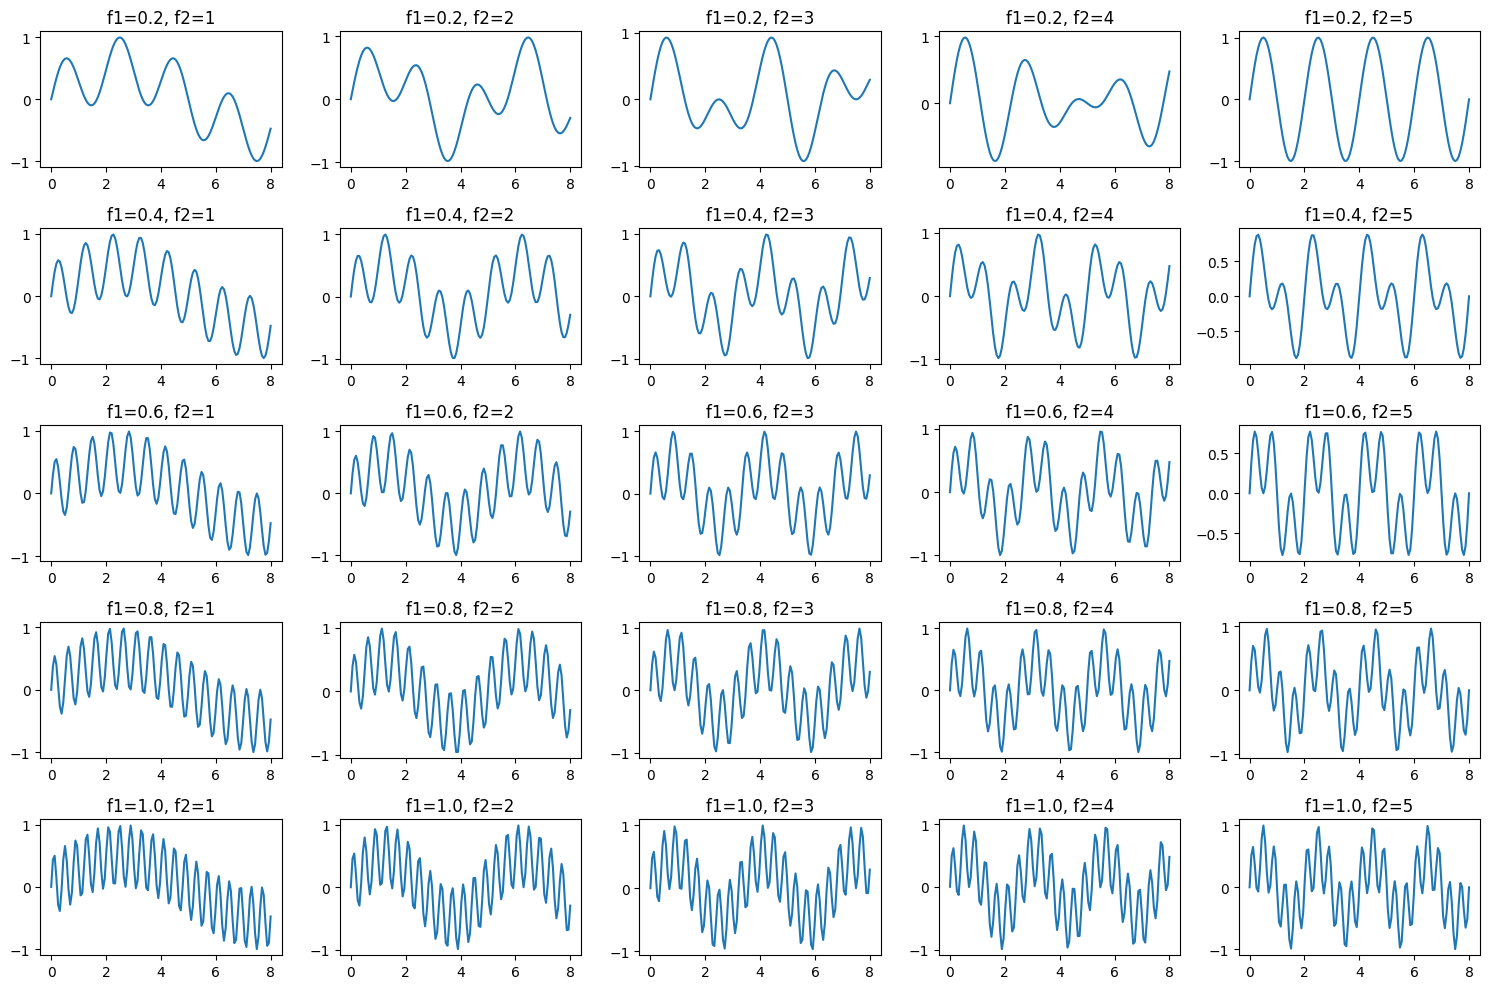

In [5]:
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
for i in range(5):
    for j in range(5):
        axes[i, j].plot(x_values, values_freqs[i][j])
        axes[i, j].set_title(f'f1={(i+1)/5}, f2={j+1}')
        # axes[i, j].set_title(f'f1={i+1}, f2={j+1}')
plt.tight_layout()
plt.show()

In [8]:
def sinu_frequency(x, freq):
    return np.sin(freq * np.pi * x)

In [9]:
import pickle
import os

In [10]:
def create_sinusoidal_seq_dataset(low_freq_range, high_freq_range, dataset_name, n_timesteps=128):
    data = []
    x = np.linspace(0, 8, n_timesteps)
    for freq_low in low_freq_range:
        for freq_high in high_freq_range:
            data.append(((sinu_frequency(x, freq_low)+sinu_frequency(x, freq_high))/2,(freq_low, freq_high)))
    if not os.path.exists(f'./dataset/{dataset_name}'):
        os.makedirs(f'./dataset/{dataset_name}')
    with open(f'./dataset/{dataset_name}/data.pkl', 'wb') as f:
        pickle.dump(data, f)
    meta_data = {'low_freq_range': low_freq_range, 'high_freq_range': high_freq_range, 'x_range': x}
    with open(f'./dataset/{dataset_name}/meta_data.pkl', 'wb') as f:
        pickle.dump(meta_data, f)
    

In [11]:
low_freq_range = np.arange(1,5,0.1)/5
high_freq_range = np.arange(1,5,0.1)
dataset_name = '2_29_sine_dataset'
create_sinusoidal_seq_dataset(low_freq_range, high_freq_range, dataset_name, n_timesteps=128)